# 02 Data Wrangling

Cyber Threat Dataset: Network, Text & Relation

Source - https://www.kaggle.com/datasets/ramoliyafenil/text-based-cyber-threat-detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("cyber-threat-intelligence_all.csv")

In [3]:
df.head()

,Unnamed: 0,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


Drop the Unnamed:0 column

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


Drop the index column

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df.head()

,text,entities,relations,Comments,id,label,start_offset,end_offset
0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


### Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          19940 non-null  object 
 1   entities      19464 non-null  object 
 2   relations     19464 non-null  object 
 3   Comments      19464 non-null  object 
 4   id            9462 non-null   float64
 5   label         9938 non-null   object 
 6   start_offset  9462 non-null   float64
 7   end_offset    9462 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


In [9]:
df.dtypes

text             object
entities         object
relations        object
Comments         object
id              float64
label            object
start_offset    float64
end_offset      float64
dtype: object

In [10]:
df.nunique()

text            8268
entities        4732
relations        481
Comments           3
id              4731
label             22
start_offset     259
end_offset       272
dtype: int64

In [11]:
df.shape

(19940, 8)

Check if there are any missing values

In [12]:
df.isnull().sum()

text                0
entities          476
relations         476
Comments          476
id              10478
label           10002
start_offset    10478
end_offset      10478
dtype: int64

Assume that all the labels that are not marked as a cyber threat are safe

In [13]:
df['label'].fillna(value='safe', inplace=True)

In [14]:
df.head()

,text,entities,relations,Comments,id,label,start_offset,end_offset
0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,Once executed by the user the first stage malw...,[],[],[],NaN,safe,NaN,NaN
3,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,The first stage downloaded the ransomware from...,[],[],[],NaN,safe,NaN,NaN


In [15]:
df.isnull().sum()

text                0
entities          476
relations         476
Comments          476
id              10478
label               0
start_offset    10478
end_offset      10478
dtype: int64

Fill in the remaining missing values with 0 as a place marker for N/A, no information

In [16]:
df=df.fillna("")

In [17]:
df.head()

,text,entities,relations,Comments,id,label,start_offset,end_offset
0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,Once executed by the user the first stage malw...,[],[],[],,safe,,
3,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,The first stage downloaded the ransomware from...,[],[],[],,safe,,


In [18]:
df.isnull().sum()

text            0
entities        0
relations       0
Comments        0
id              0
label           0
start_offset    0
end_offset      0
dtype: int64

Check for any duplicate rows

In [19]:
duplicateRowsDF=df[df.duplicated()]
duplicateRowsDF

,text,entities,relations,Comments,id,label,start_offset,end_offset
88,"Sign up to receive the latest news, cyber thr...",[],[],[],,safe,,
135,"By submitting this form, you agree to our Term...",[],[],[],,safe,,
178,"Sign up to receive the latest news, cyber thr...",[],[],[],,safe,,
179,"Please mark, I'm not a robot!",[],[],[],,safe,,
180,"By submitting this form, you agree to our Term...",[],[],[],,safe,,
...,...,...,...,...,...,...,...,...
19935,"Cyclops Blink, an advanced modular botnet that...",,,,,malware,,
19936,Sofacy Group has been associated with many at...,,,,,location,,
19937,The plugin has been designed to drop multiple ...,,,,,Infrastucture,,
19938,We have uncovered a cyberespionage campaign be...,,,,,threat-actor,,


In [20]:
duplicateRowsDF.shape

(10671, 8)

Drop all of the duplicate rows

In [21]:
df = df.drop_duplicates()

In [22]:
duplicateRowsDF=df[df.duplicated()]
duplicateRowsDF

,text,entities,relations,Comments,id,label,start_offset,end_offset


This is the cleaned data that is ready for further analysis

In [23]:
df.shape

(9269, 8)

In [24]:
df.head()

,text,entities,relations,Comments,id,label,start_offset,end_offset
0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,Once executed by the user the first stage malw...,[],[],[],,safe,,
3,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,The first stage downloaded the ransomware from...,[],[],[],,safe,,


In [25]:
df.to_csv('Wrangled.csv')

# 03 EDA

In [26]:
!pip install langid

In [27]:
import nltk 
import string
import re
import langid
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will focus on the text and label columns of the data and create a new DataFrame

In [28]:
activity = df[['text','label']]

In [29]:
activity.head()

,text,label
0,This post is also available in: 日本語 (Japa...,malware
1,The attack vector is very basic and repeats it...,attack-pattern
2,Once executed by the user the first stage malw...,safe
3,The first known campaign was launched by Crim...,TIME
4,The first stage downloaded the ransomware from...,safe


This is the different types of cyber activity in the dataset

In [30]:
activity['label'].unique()

array(['malware', 'attack-pattern', 'safe', 'TIME', 'identity',
       'SOFTWARE', 'threat-actor', 'location', 'tools', 'FILEPATH',
       'SHA2', 'vulnerability', 'URL', 'DOMAIN', 'IPV4', 'campaign',
       'EMAIL', 'REGISTRYKEY', 'SHA1', 'Infrastucture', 'MD5', 'url',
       'hash'], dtype=object)

In [31]:
activity['label'].nunique()

23

Now we will check the number of instances of each cyber activity

In [32]:
label_df = activity['label'].value_counts().reset_index()
label_df

,index,label
0,safe,4140
1,malware,1003
2,location,711
3,SOFTWARE,623
4,attack-pattern,617
5,identity,593
6,threat-actor,466
7,TIME,245
8,tools,201
9,FILEPATH,162


[Text(0.5, 0, 'count'), Text(0, 0.5, 'label')]

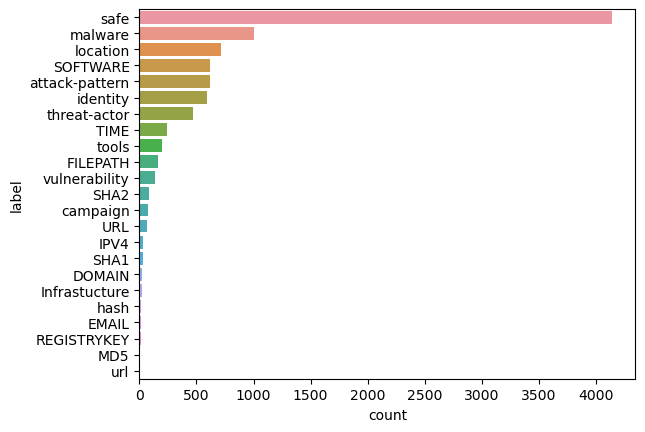

In [33]:
ax = sns.barplot(data = label_df, x='label', y='index')
ax.set(xlabel='count', ylabel='label')

Based on the chart above, majority of the data is safe. There are around 1200 instances of malware, around 750 instances of attack-pattern, and around 600 instances of threat-actor.

In [34]:
sample_text = activity['text'][3]
sample_text

' The first known campaign was launched by Crimeware on November 2014.'

In [35]:
activity.dtypes

text     object
label    object
dtype: object

Counting the number of words in the text data

In [36]:
def Get_WordCount(text):
    return len(text.split())

In [37]:
Get_WordCount(sample_text)

11

In [38]:
activity['word_count'] = activity['text'].apply(lambda x: Get_WordCount(x))
activity.head()

C:\Users\veron\AppData\Local\Temp\ipykernel_14032\2142857729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['word_count'] = activity['text'].apply(lambda x: Get_WordCount(x))


,text,label,word_count
0,This post is also available in: 日本語 (Japa...,malware,55
1,The attack vector is very basic and repeats it...,attack-pattern,22
2,Once executed by the user the first stage malw...,safe,20
3,The first known campaign was launched by Crim...,TIME,11
4,The first stage downloaded the ransomware from...,safe,9


In [39]:
Total_word_count = activity['word_count'].sum()
print('Total Number of Words = ', Total_word_count)

Total Number of Words =  187768


In [40]:
avg_word_count = activity['word_count'].mean()
print('Average Number of Words = ', round(avg_word_count, 2))

Average Number of Words =  20.26


In [41]:
activity.describe()

,word_count
count,9269.000000
mean,20.257633
std,14.459955
min,1.000000
25%,12.000000
50%,18.000000
75%,26.000000
max,490.000000


In [42]:
activity[activity['word_count'] == 490].iloc[0,1]

'tools'

The word with the most word count is 'tools'

<Axes: ylabel='Frequency'>

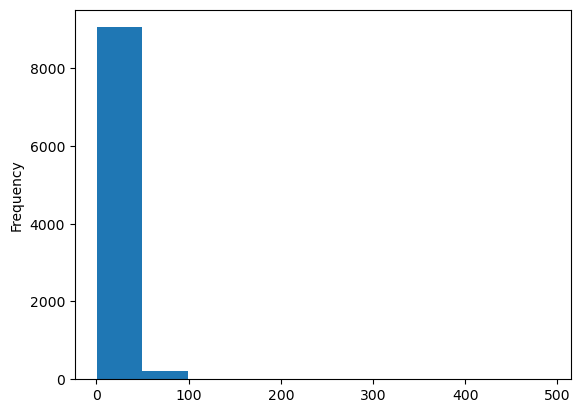

In [43]:
activity.word_count.plot(kind = 'hist')

<Axes: ylabel='Density'>

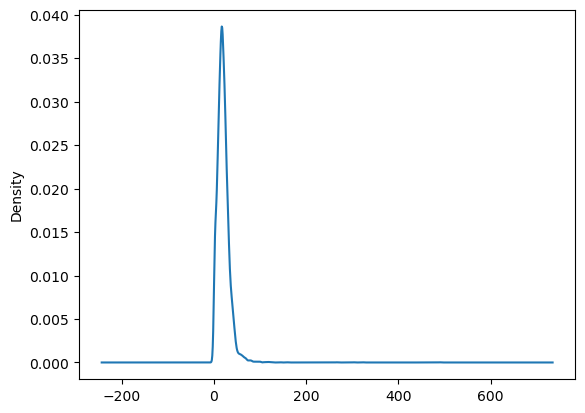

In [44]:
activity.word_count.plot(kind = 'kde')

The word count is between 1 - 100 with majority of the data having fewer word count

<Axes: >

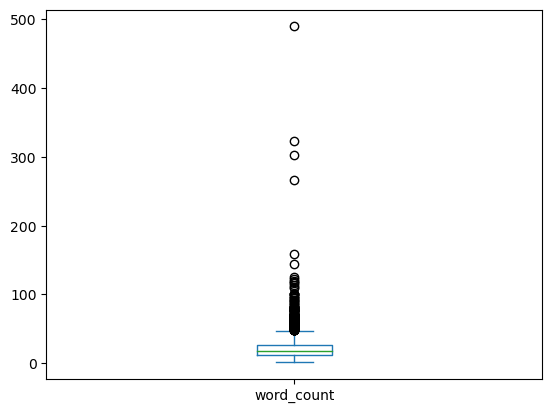

In [45]:
activity['word_count'].plot(kind = 'box')

There are some outliers in the data with very high word count

#### Top 5 longest word count:

In [46]:
activity.sort_values(['word_count'], ascending=False).head(5)

,text,label,word_count
8111,"Administrative Office of the President, Afghan...",tools,490
3252,Command Behavior Compress_Files Compresses...,FILEPATH,323
3410,systemsetting.exe BIOPASS RAT binary (PyInsta...,malware,303
5795,Indicators of Compromise Indicator Descripti...,threat-actor,266
2667,Several adversarial techniques were observed ...,identity,159


#### Top 5 shortest word count:

In [47]:
activity.sort_values(['word_count'], ascending=True).head(5)

,text,label,word_count
5505,StealthWorker,safe,1
3366,flash.exe,malware,1
2360,ScrambleCross,malware,1
3377,Win64.BIOPASS.A,malware,1
7727,Buffer,safe,1


We can also check the character count

In [48]:
def Get_char_count(text):
    return len(text)

In [49]:
Get_char_count(sample_text)

69

In [50]:
activity['char_length'] = activity['text'].apply(lambda x: Get_char_count(x))

C:\Users\veron\AppData\Local\Temp\ipykernel_14032\1616069763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['char_length'] = activity['text'].apply(lambda x: Get_char_count(x))


In [51]:
activity.head()

,text,label,word_count,char_length
0,This post is also available in: 日本語 (Japa...,malware,55,354
1,The attack vector is very basic and repeats it...,attack-pattern,22,132
2,Once executed by the user the first stage malw...,safe,20,123
3,The first known campaign was launched by Crim...,TIME,11,69
4,The first stage downloaded the ransomware from...,safe,9,59


In [52]:
activity['char_length'].describe()

count    9269.000000
mean      140.108642
std       153.258854
min         3.000000
25%        79.000000
50%       121.000000
75%       172.000000
max      5006.000000
Name: char_length, dtype: float64

<Axes: ylabel='Frequency'>

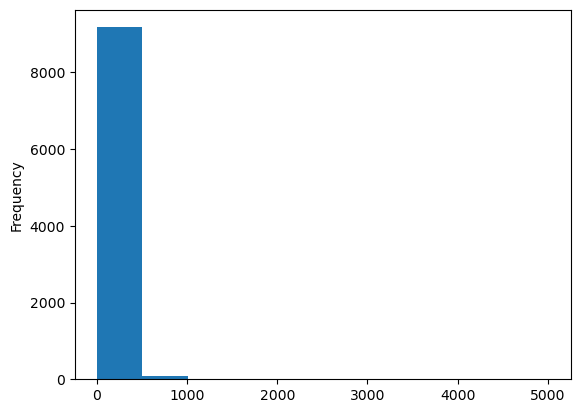

In [53]:
activity['char_length'].plot(kind = 'hist')

The histograph shows similar results as the word count

Listing the word count and character count in a DataFrame for side by side comparison

In [54]:
activity.groupby(['label'])[['word_count', 'char_length']].mean().reset_index().sort_values(['word_count'], ascending=False)

,label,word_count,char_length
16,location,27.693390,199.960619
22,vulnerability,26.814815,185.348148
21,url,26.750000,178.250000
6,REGISTRYKEY,26.400000,225.800000
19,threat-actor,25.444206,177.510730
3,IPV4,25.322581,233.387097
20,tools,24.631841,172.427861
15,identity,24.121417,158.956155
9,SOFTWARE,23.659711,151.707865
2,FILEPATH,23.648148,195.777778


Preprocessing the data to do the following:

* Remove brackets
* Remove punctuation
* Convert text to lowercase
* Remove foreign language
* Tokenize the text
* Remove stop words
* Lemmatize the text

In [55]:
def tokenize_text(text):
    
    text = re.sub(r'[\[\](){}<>]', '', text)
    
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = text.lower()
    
    lang, _ = langid.classify(text)
    
    if lang == 'en':
    
        tokens = word_tokenize(text)
    
        stop_words = set(stopwords.words('english'))
    
        punctuations = set(string.punctuation)
    
    
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuations]
    
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
        tokenize_text = ' '.join(lemmatized_tokens)
    
        return tokenize_text
    else:
        return ''

In [56]:
activity['tokenize_text'] = activity['text'].apply(tokenize_text)

C:\Users\veron\AppData\Local\Temp\ipykernel_14032\3940058043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['tokenize_text'] = activity['text'].apply(tokenize_text)


In [57]:
activity.head()

,text,label,word_count,char_length,tokenize_text
0,This post is also available in: 日本語 (Japa...,malware,55,354,post also available 日本語 japanese ctblocker wel...
1,The attack vector is very basic and repeats it...,attack-pattern,22,132,attack vector basic repeat begin spear phishin...
2,Once executed by the user the first stage malw...,safe,20,123,executed user first stage malware downloads ex...
3,The first known campaign was launched by Crim...,TIME,11,69,first known campaign launched crimeware november
4,The first stage downloaded the ransomware from...,safe,9,59,first stage downloaded ransomware site


Create a chart with the top 20 most common words

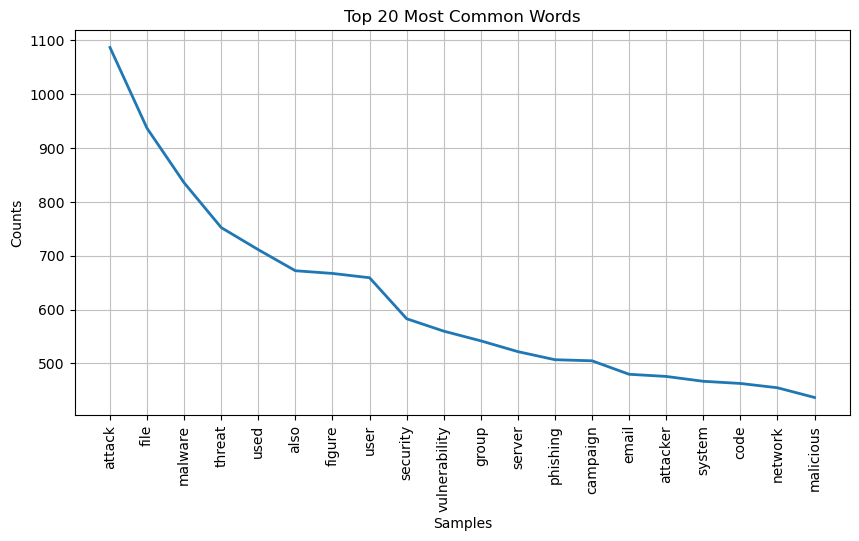

In [58]:
all_tokens = [word for sublist in activity['tokenize_text'] for word in sublist.split()]
fdist = FreqDist(all_tokens)
plt.figure(figsize=(10, 5))
fdist.plot(20, title='Top 20 Most Common Words')
plt.show()

In [59]:
activity.to_csv('preprocessed.csv')